<a href="https://colab.research.google.com/github/Hugekyung/TIL/blob/master/machine_learning/sklearn_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 파라미터 조정(최적의 파라미터 찾기)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## train, test 데이터셋 만들기

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [6]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]

X.shape

(768, 9)

In [7]:
y = df['Outcome']
y.shape

(768,)

In [8]:
from sklearn.model_selection import train_test_split # 비율대로 랜덤하게 나눈다

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42 가져오는 데이터 고정

In [11]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [12]:
X_test.shape, y_test.shape

((154, 9), (154,))

## 랜덤값을 고정하여 디시전트리로 학습과 예측하기

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
for max_depth in range(3, 12):
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth) # random_state=42 고정
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [52]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

## 정확도 측정하기

In [53]:
# 실제값 - 예측값 = 틀린것의 개수
abs(y_predict - y_test).sum()

22

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

85.71428571428571

## 최적의 max_depth 파라미터값 찾기

In [55]:
feature_names = X_train.columns.tolist()

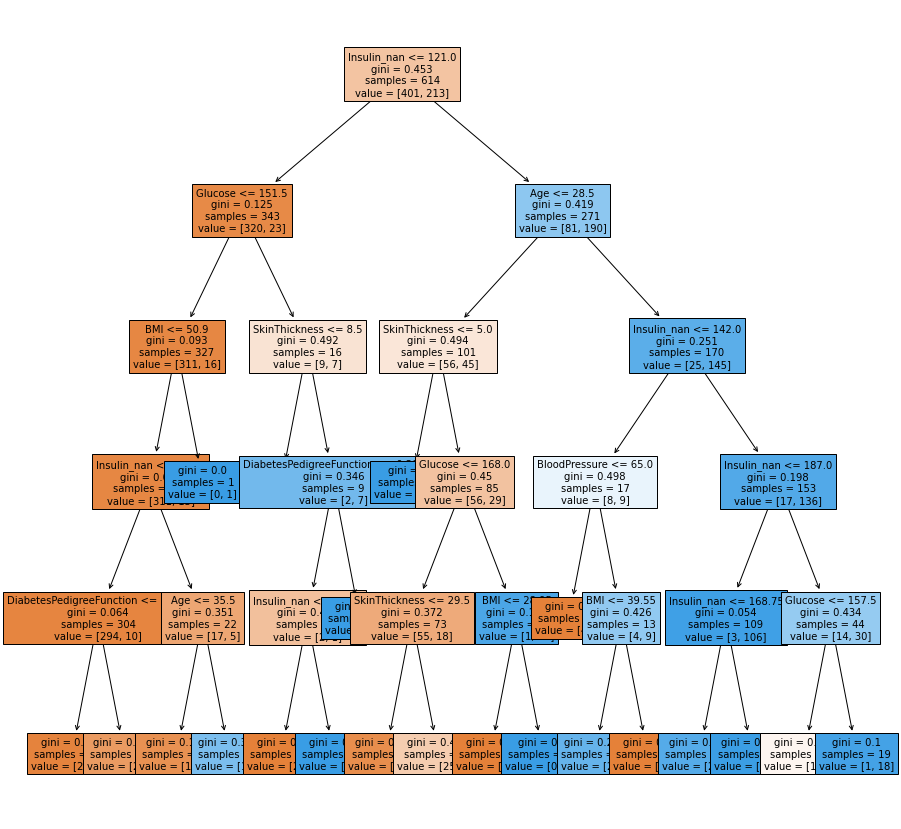

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model, fontsize=10, feature_names=feature_names, filled=True)

## GridSearchCV 를 사용해서 최적의 하이퍼 파라미터 값 찾기
- 우리가 지정해준 범위 내에서만 최적의 값을 찾는다.

In [62]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth" : (3, 12),
              "max_features" : [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
# n_jobs=-1로 지정하면 모든 프로세스 다 사용
# cv는 cross validation(fold를 5개로 나눠서 학습)
# verbose=1 로그를 볼 수 있다.
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': (3, 12),
                         'max_featu

In [63]:
clf.best_params_

{'max_depth': 3, 'max_features': 0.5}

In [64]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [65]:
clf.best_score_

0.8551512728242037

In [69]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.005650,0.002824,0.002537,0.001594,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,1
8,0.005612,0.000216,0.001755,0.000077,12,0.9,"{'max_depth': 12, 'max_features': 0.9}",0.821138,0.878049,0.796748,0.878049,0.860656,0.846928,0.032584,2
6,0.005851,0.001993,0.001710,0.000031,12,0.5,"{'max_depth': 12, 'max_features': 0.5}",0.837398,0.886179,0.780488,0.853659,0.868852,0.845315,0.036218,3
5,0.004301,0.000147,0.001591,0.000065,12,0.3,"{'max_depth': 12, 'max_features': 0.3}",0.804878,0.869919,0.804878,0.869919,0.868852,0.843689,0.031692,4
7,0.005049,0.000088,0.001701,0.000087,12,0.7,"{'max_depth': 12, 'max_features': 0.7}",0.829268,0.845528,0.829268,0.853659,0.844262,0.840397,0.009642,5


In [70]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [71]:
clf.score(X_test, y_test)

0.8571428571428571

## RamdomSearchCV 를 사용해서 최적의 하이퍼 파라미터 값 찾기

In [96]:
max_depth = np.random.randint(3, 20, 10)

In [97]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [98]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth" : max_depth,
                       "max_features" : max_features,
                       "min_samples_split" : list(range(2,7))
                       }
clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=500,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   verbose=1,
                   random_state=42
                   )

clf.fit(X_train, y_train)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   10.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [99]:
clf.best_params_

{'max_depth': 10, 'max_features': 0.8626000767196103, 'min_samples_split': 4}

In [100]:
clf.best_score_

0.8713847794215648

In [101]:
clf.score(X_test, y_test)

0.8571428571428571

In [102]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
144,0.007486,0.002661,0.001975,0.000191,4,0.798152,10,"{'min_samples_split': 4, 'max_features': 0.798...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
328,0.005402,0.000501,0.001717,0.000077,4,0.882597,10,"{'min_samples_split': 4, 'max_features': 0.882...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
135,0.006697,0.002644,0.002044,0.000496,4,0.8626,10,"{'min_samples_split': 4, 'max_features': 0.862...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
202,0.005063,0.000309,0.001880,0.000280,4,0.744076,5,"{'min_samples_split': 4, 'max_features': 0.744...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,4
475,0.004708,0.000050,0.001691,0.000086,4,0.74282,5,"{'min_samples_split': 4, 'max_features': 0.742...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,4


# 랜덤포레스트 & 그래디언트 부스팅

## single tree

In [113]:
# 일반 디시전 트리
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model

## Bagging(랜덤포레스트)

In [115]:
# 랜덤 포레스트
# from sklearn.ensemble import  RandomForestClassifier

# model = RandomForestClassifier(random_state=42)

## Boosting(그래디언트 부스팅)

In [134]:
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=4, random_state=42)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## 여러 개 알고리즘으로 한번에 테스트하기

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimator = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
             ]
estimator

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 GradientBoost

In [162]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth" : max_depth,
                       "max_features" : max_features
                       }

for e in estimator:
    clf = RandomizedSearchCV(e, param_distributions=param_distributions, n_iter=10,
                    scoring="accuracy", n_jobs=-1, cv=5, verbose=2)
    clf.fit(X_train, y_train )
    print(e.__class__.__name__)
    print(clf.best_params_)
    print(clf.best_score_)
    print(clf.score(X_test, y_test))
    print('===================================================================')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


DecisionTreeClassifier
{'max_features': 0.5437158541397175, 'max_depth': 3}
0.8551512728242037
0.8571428571428571
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.7s finished


RandomForestClassifier
{'max_features': 0.597955431179622, 'max_depth': 13}
0.900719712115154
0.8571428571428571
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.3s finished


GradientBoostingClassifier
{'max_features': 0.5406815119446113, 'max_depth': 13}
0.900693056110889
0.8636363636363636


In [136]:
y_predict = model.predict(X_test)

In [137]:
(y_predict != y_test).sum()

22

In [138]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8571428571428571

In [139]:
model.feature_importances_

array([1.05452923e-01, 1.63520891e-02, 8.22264226e-02, 3.59723070e-02,
       3.08548052e-02, 1.08288903e-01, 4.26092038e-04, 6.20398965e-01,
       2.74933152e-05])

In [140]:
feature_names = X_train.columns.tolist()

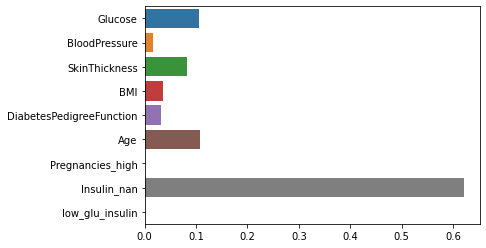

In [141]:
# feature 중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)